In [1]:
# To get the values for each peak 

import numpy as np 
import pandas as pd

#file_path = 'DataCSVFiles/Ba-133data.csv'
#file_path = 'DataCSVFiles/Cd-109data.csv'
#file_path = 'DataCSVFiles/Co-57data.csv'
#file_path = 'DataCSVFiles/Co-60data.csv'
#file_path = 'DataCSVFiles/Mn-54data.csv'
#file_path = 'DataCSVFiles/Na-22data.csv'  
file_path = 'DataCSVFiles/Unknowndata.csv'

selected_columns = [0, 2]
df = pd.read_csv(file_path, delimiter=',', skiprows=21, usecols=selected_columns)
data_array = df.to_numpy()
#print(df)
for row in data_array:
    print(row)
max_value_in_column = np.max(data_array[:, 1])
print(max_value_in_column)
print(data_array)

[0 0]
[1 0]
[2 0]
[3 0]
[4 0]
[5 0]
[6 0]
[7 0]
[8 0]
[9 0]
[10  0]
[11  0]
[12  1]
[13  0]
[14  0]
[15  0]
[16  0]
[17  0]
[18  0]
[19  0]
[20  0]
[21  0]
[22  0]
[23  0]
[24  1]
[25  0]
[26  0]
[ 27 160]
[ 28 187]
[ 29 119]
[ 30 112]
[ 31 113]
[ 32 105]
[ 33 110]
[ 34 124]
[ 35 141]
[ 36 144]
[ 37 155]
[ 38 160]
[ 39 163]
[ 40 180]
[ 41 198]
[ 42 195]
[ 43 214]
[ 44 301]
[ 45 353]
[ 46 385]
[ 47 551]
[ 48 646]
[ 49 804]
[ 50 959]
[  51 1283]
[  52 1583]
[  53 1933]
[  54 2202]
[  55 2586]
[  56 2771]
[  57 2997]
[  58 2958]
[  59 3095]
[  60 2713]
[  61 2504]
[  62 2257]
[  63 1758]
[  64 1554]
[  65 1351]
[  66 1149]
[  67 1045]
[ 68 890]
[ 69 781]
[ 70 731]
[ 71 575]
[ 72 508]
[ 73 445]
[ 74 411]
[ 75 348]
[ 76 314]
[ 77 323]
[ 78 296]
[ 79 279]
[ 80 285]
[ 81 267]
[ 82 263]
[ 83 253]
[ 84 251]
[ 85 281]
[ 86 253]
[ 87 251]
[ 88 238]
[ 89 251]
[ 90 262]
[ 91 254]
[ 92 235]
[ 93 230]
[ 94 245]
[ 95 244]
[ 96 242]
[ 97 250]
[ 98 260]
[ 99 269]
[100 261]
[101 256]
[102 255]
[103 257]


In [50]:
# To be able to plot data with Gaussian fits

import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gauss_function(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))

def fit_multiple_gaussians(x, y, peak_positions_and_amplitudes):
    fits = []
    
    for position, amplitude in peak_positions_and_amplitudes:
        x_range = x[(x >= position - 10) & (x <= position + 10)]
        y_range = y[(x >= position - 10) & (x <= position + 10)]
        
        #initial_guess = [np.max(y_range), position, initial_stddev]

        initial_guess = [np.max(y_range), position, 1.0] # Amplitude, Mean, and StDev respectively
        
        params, _ = curve_fit(gauss_function, x_range, y_range, p0=initial_guess)
        fits.append(params)
    
    return fits

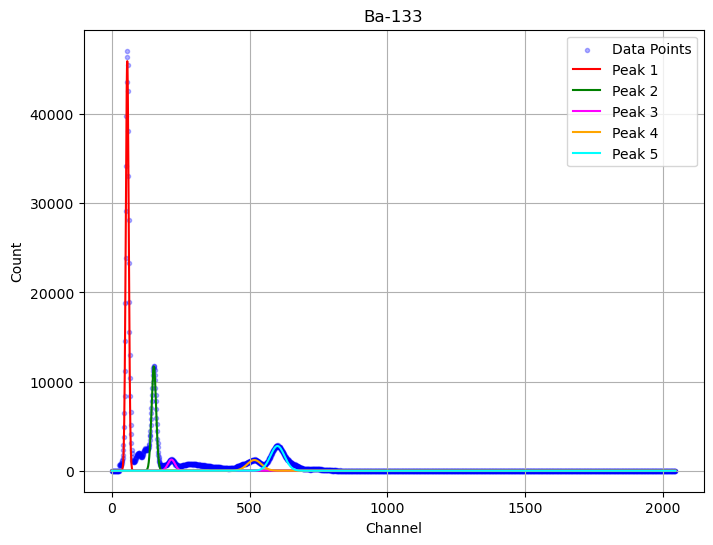

In [51]:
data = py.loadtxt('DataCSVFiles/Ba-133data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [56, 47130],
    [154, 11761],
    [218, 1284],
    [519, 1267],
    [603, 2810]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133')
plt.legend()
plt.grid(True)
plt.show()

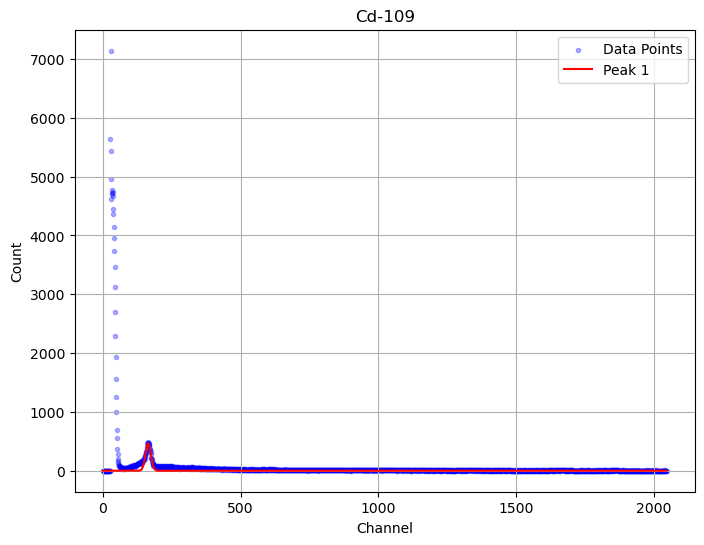

In [54]:
data = py.loadtxt('DataCSVFiles/Cd-109data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [162, 482]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Cd-109')
plt.legend()
plt.grid(True)
plt.show()

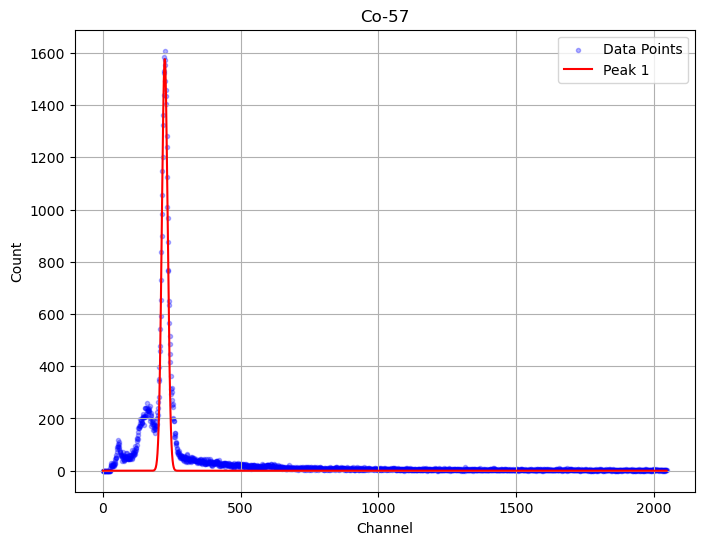

In [39]:
data = py.loadtxt('DataCSVFiles/Co-57data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [225, 1608]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-57')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
data = py.loadtxt('DataCSVFiles/Co-60data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [1677,319],
    [1873,243]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Co-60')
plt.legend()
plt.grid(True)
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

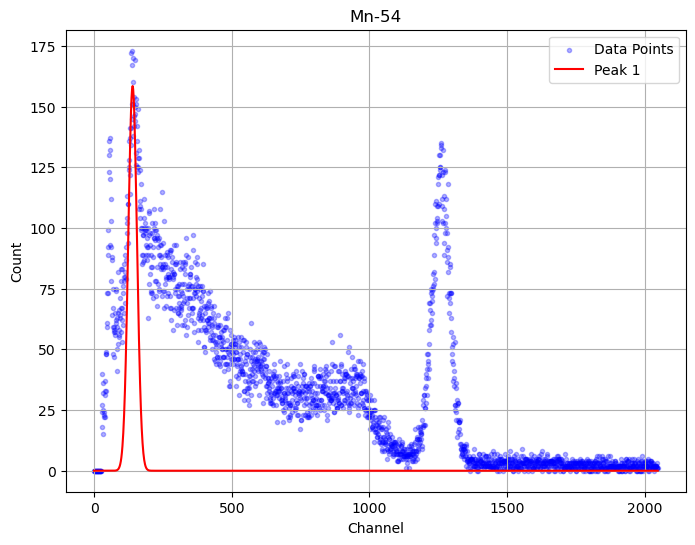

In [40]:
data = py.loadtxt('DataCSVFiles/Mn-54data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [138, 173]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Mn-54')
plt.legend()
plt.grid(True)
plt.show()

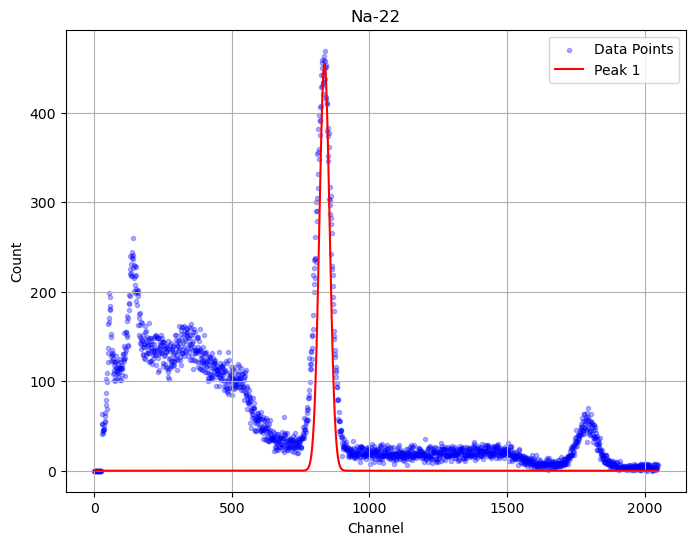

In [36]:
data = py.loadtxt('DataCSVFiles/Na-22data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [840, 469]#,
    #[1795, 60]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Na-22')
plt.legend()
plt.grid(True)
plt.show()

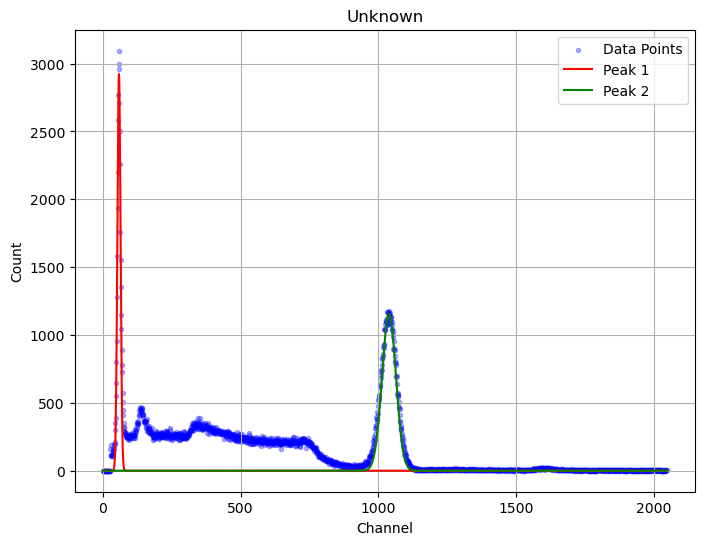

In [11]:
data = py.loadtxt('DataCSVFiles/Unknowndata.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_positions_and_amplitudes = [
    [59, 3095],
    [1040, 1177]
]

fits = fit_multiple_gaussians(x, y, peak_positions_and_amplitudes)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev = params
    y_fit = gauss_function(x, amplitude, mean, stddev)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Unknown')
plt.legend()
plt.grid(True)
plt.show()

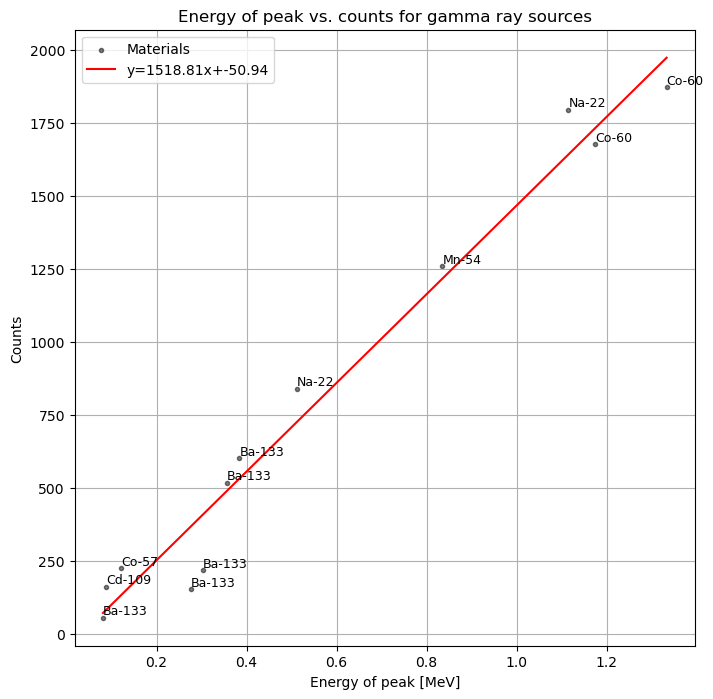

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Material: [Channel, Count]
# Ba-133: [56, ], [154, ], [218, ], [519, ], [603, ]
#

# In order: Ba-133, Cd-109, Co-57, Ba-133, Ba-133, Ba-133, Ba-133, Na-22, Mn-54, Na-22, Co-60, Co-60
E_values = [0.081, 0.088, 0.122, 0.276, 0.303, 0.356, 0.384, 0.511, 0.835, 1.115, 1.175, 1.333]
C_values = [56, 162, 225, 154, 218, 519, 603, 840, 1259, 1795, 1677, 1873]

m, b = np.polyfit(E_values, C_values, 1)

best_fit_line = [m * E + b for E in E_values]

data_labels = ['Ba-133', 'Cd-109', 'Co-57', 'Ba-133', 'Ba-133', 'Ba-133',
               'Ba-133', 'Na-22', 'Mn-54', 'Na-22', 'Co-60', 'Co-60']

plt.figure(figsize=(8, 8))
plt.scatter(E_values, C_values, label='Materials', color='black', marker='.', alpha=0.5)
plt.plot(E_values, best_fit_line, label=f'y={slope:.2f}x+{intercept:.2f}', color='red')

for x, y, label in zip(E_values, C_values, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='bottom')


#plt.xticks(x_values)
plt.xlabel('Energy of peak [MeV]')
plt.ylabel('Counts')
plt.title('Energy of peak vs. counts for gamma ray sources')
plt.legend()
plt.grid(True)
plt.show()


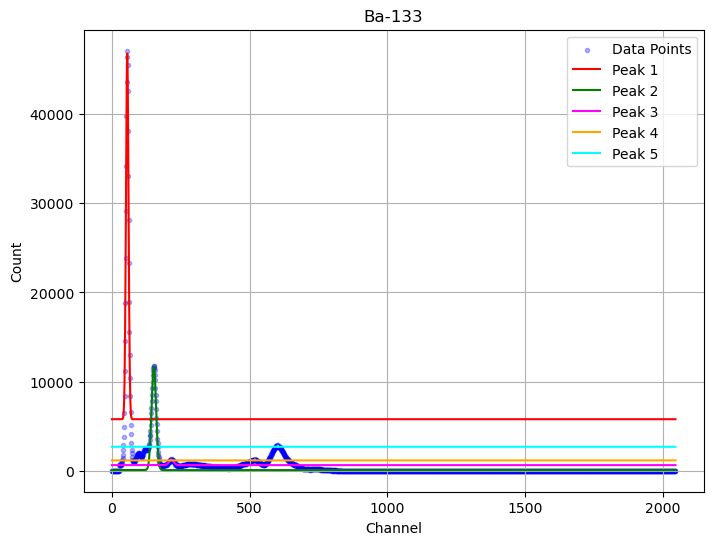

In [82]:
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gauss_function(x, amplitude, mean, stddev, baseline):
    return amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2)) + baseline

def fit_multiple_gaussians(x, y, peak_parameters):
    fits = []
    
    for params in peak_parameters:
        position, amplitude, stddev, baseline = params
        x_range = x[(x >= position - 10) & (x <= position + 10)]
        y_range = y[(x >= position - 10) & (x <= position + 10)]
        
        initial_guess = [amplitude, position, stddev, baseline]
        
        params, _ = curve_fit(gauss_function, x_range, y_range, p0=initial_guess)
        fits.append(params)
    
    return fits

data = py.loadtxt('DataCSVFiles/Ba-133data.csv', skiprows=22, delimiter=',', usecols=(0, 2))
x = data[:, 0]
y = data[:, 1]

peak_parameters = [
    [56, 47130, 1.0, 0],  # [position, amplitude, stddev, baseline]
    [154, 11761, 1.0, 0],
    [218, 1284, 1.0, 0],
    [519, 1267, 1.0, 0],
    [603, 2810, 1.0, 0]
]

fits = fit_multiple_gaussians(x, y, peak_parameters)

plt.figure(figsize=(8, 6))

plt.scatter(x, y, label='Data Points', color='blue', marker='.', alpha=0.3)
for i, params in enumerate(fits):
    amplitude, mean, stddev, baseline = params
    y_fit = gauss_function(x, amplitude, mean, stddev, baseline)
    colors = ['red', 'green', 'magenta', 'orange', 'cyan']
    plt.plot(x, y_fit, label=f'Peak {i+1}', color=colors[i], alpha=1.0)

plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Ba-133')
plt.legend()
plt.grid(True)
plt.show()
